**About Book Crossing Dataset**<br>

This dataset has been compiled by Cai-Nicolas Ziegler in 2004, and it comprises of three tables for users, books and ratings. Explicit ratings are expressed on a scale from 1-10 (higher values denoting higher appreciation) and implicit rating is expressed by 0.

Reference: http://www2.informatik.uni-freiburg.de/~cziegler/BX/ 

**Objective**

This project entails building a Book Recommender System for users based on user-based and item-based collaborative filtering approaches.

#### Execute the below cell to load the datasets

In [487]:
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import time
from sklearn.externals import joblib
#import Recommenders as Recommenders
#import Evaluation as Evaluation

In [488]:
#Loading data
books = pd.read_csv("books/books.csv", sep=";", error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']

users = pd.read_csv('books/users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']

ratings = pd.read_csv('books/ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


### Check no.of records and features given in each dataset

In [489]:
print("Data for book csv:",books.shape)
books.info()

Data for book csv: (271360, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
ISBN                 271360 non-null object
bookTitle            271360 non-null object
bookAuthor           271359 non-null object
yearOfPublication    271360 non-null object
publisher            271358 non-null object
imageUrlS            271360 non-null object
imageUrlM            271360 non-null object
imageUrlL            271357 non-null object
dtypes: object(8)
memory usage: 16.6+ MB


In [490]:
print("Data for users csv:",users.shape)
users.info()

Data for users csv: (278858, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
userID      278858 non-null int64
Location    278858 non-null object
Age         168096 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [491]:
print("Data for ratings csv:",ratings.shape)
ratings.info()

Data for ratings csv: (1149780, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
userID        1149780 non-null int64
ISBN          1149780 non-null object
bookRating    1149780 non-null int64
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


## Exploring books dataset

In [492]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


### Drop last three columns containing image URLs which will not be required for analysis

In [493]:
books.columns

Index(['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher',
       'imageUrlS', 'imageUrlM', 'imageUrlL'],
      dtype='object')

In [494]:
books = books.iloc[:, :-3]

In [495]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


**yearOfPublication**

### Check unique values of yearOfPublication


In [496]:
books['yearOfPublication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

As it can be seen from above that there are some incorrect entries in this field. It looks like Publisher names 'DK Publishing Inc' and 'Gallimard' have been incorrectly loaded as yearOfPublication in dataset due to some errors in csv file.


Also some of the entries are strings and same years have been entered as numbers in some places. We will try to fix these things in the coming questions.

### Check the rows having 'DK Publishing Inc' as yearOfPublication

In [497]:
books[books['yearOfPublication'] == "DK Publishing Inc"]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [498]:
# We found 2 rows having 'DK Publishing Inc' as yearOfPublication

In [499]:
books[books['yearOfPublication'] == "Gallimard"]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


In [500]:
# We found one row having 'Gallimard' as yearOfPublication

### Drop the rows having `'DK Publishing Inc'` and `'Gallimard'` as `yearOfPublication`

In [501]:
# Drop the rows having `'DK Publishing Inc'`
books = books[books['yearOfPublication'] != "DK Publishing Inc"]

In [502]:
# Drop the rows having `'Gallimard'`
books = books[books['yearOfPublication'] != "Gallimard"]

In [503]:
books.shape

(271357, 5)

### Change the datatype of yearOfPublication to 'int'

In [504]:
books["yearOfPublication"] = books["yearOfPublication"].astype(int)

In [505]:
books.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication     int32
publisher            object
dtype: object

### Drop NaNs in `'publisher'` column


In [506]:
#books[books['publisher'] == "NaN"]
books['publisher'].isnull().count()

271357

## Exploring Users dataset

In [507]:
print(users.shape)
users.head()

(278858, 3)


,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### Get all unique values in ascending order for column `Age`

In [508]:
#users['Age'].unique()
print(sorted(users['Age'].unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

In [509]:
# Actual count for present values for each column.
users.count()

userID      278858
Location    278858
Age         168096
dtype: int64

In [510]:
# Count of Null values
users.isna().sum()

userID           0
Location         0
Age         110762
dtype: int64

In [511]:
# We can see There are 110762 values are null/missing for column Age.

In [512]:
#users.sort_values(users['Age'].unique(),ascending=False)

Age column has some invalid entries like nan, 0 and very high values like 100 and above

### Values below 5 and above 90 do not make much sense for our book rating case...hence replace these by NaNs

In [513]:
# delete all rows with column 'Age' has value 30 to 40 
#indexNames = dfObj[ (dfObj['Age'] >= 30) & (dfObj['Age'] <= 40) ].index

# No of values below 5 and above 90
user_nan = (users[(users['Age'] < 5) | (users['Age'] > 90)])
user_nan.count()

userID      1312
Location    1312
Age         1312
dtype: int64

In [514]:
#users.replace((users[(users['Age'] < 5) | (users['Age'] > 100)]), np.nan)
users.replace((users[(users['Age'] < 5)]), np.nan, inplace=True)
users.replace((users[(users['Age'] > 90)]), np.nan, inplace=True)

In [515]:
users.Age.unique()

array([nan, 18., 17., 61., 26., 14., 25., 19., 46., 55., 32., 24., 20.,
       34., 23., 51., 31., 21., 44., 30., 57., 43., 37., 41., 54., 42.,
       50., 39., 53., 47., 36., 28., 35., 13., 58., 49., 38., 45., 62.,
       63., 27., 33., 29., 66., 40., 15., 60., 79., 22., 16., 65., 59.,
       48., 72., 56., 67., 80., 52., 69., 71., 73., 78.,  9., 64., 12.,
       74., 75., 76., 83., 68., 11., 77., 70.,  8.,  7., 81., 10.,  5.,
        6., 84., 82., 90., 85., 86., 87., 89., 88.])

### Replace null values in column `Age` with mean

In [516]:
users.Age.mean()

34.72384041634689

In [517]:
#users.Age.replace('NaN', users.Age.mean(), inplace=True)
users['Age'] = users.Age.fillna(users.Age.mean())

In [518]:
users.head()

,userID,Location,Age
0,1.0,"nyc, new york, usa",34.72384
1,2.0,"stockton, california, usa",18.00000
2,3.0,"moscow, yukon territory, russia",34.72384
3,4.0,"porto, v.n.gaia, portugal",17.00000
4,5.0,"farnborough, hants, united kingdom",34.72384


### Change the datatype of `Age` to `int`

In [519]:
users["Age"] = users["Age"].astype(int)

In [520]:
print(sorted(users.Age.unique()))

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


## Exploring the Ratings Dataset

### check the shape

In [521]:
print(ratings.shape)
print(ratings.columns)

(1149780, 3)
Index(['userID', 'ISBN', 'bookRating'], dtype='object')


In [522]:
n_users = users.shape[0]
n_books = books.shape[0]

In [523]:
ratings.head(5)

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


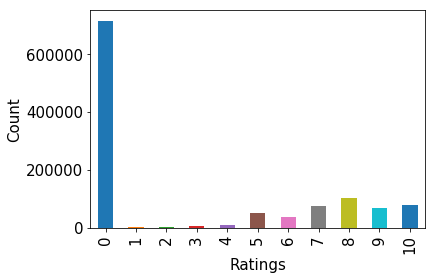

In [524]:
import matplotlib.pyplot as plt
plt.rc("font", size=15)
ratings.bookRating.value_counts(sort=False).plot(kind='bar')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

### Ratings dataset should have books only which exist in our books dataset. Drop the remaining rows

In [525]:
ratings_new = ratings[ratings.ISBN.isin(books.ISBN)]

### Ratings dataset should have ratings from users which exist in users dataset. Drop the remaining rows

In [526]:
ratings_new = ratings_new[ratings_new.userID.isin(users.userID)]

In [527]:
print(ratings.shape)
print(ratings_new.shape)

(1149780, 3)
(1026153, 3)


In [528]:
# Here, 1031136 users have rated some of the books, which are not part of original books dataset.

### Consider only ratings from 1-10 and leave 0s in column `bookRating`

In [529]:
ratings.bookRating.unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

In [530]:
ratings_nonzero = ratings_new[ratings_new.bookRating != 0]
#ratings_zero = ratings_new[ratings_new.bookRating == 0]

In [531]:
ratings_nonzero.head()

,userID,ISBN,bookRating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
8,276744,038550120X,7
16,276747,0060517794,9


### Find out which rating has been given highest number of times

In [532]:
#sns.countplot(data=ratings_nonzero, x=bookRating)
#plt.show()
ratings_count = pd.DataFrame(ratings_nonzero.groupby(['bookRating'])['bookRating'].sum())
ratings_count.sort_values('bookRating', ascending=False)

C:\Users\Mangesh Karande\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'bookRating' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  after removing the cwd from sys.path.


,bookRating
bookRating,
8,730920
10,709630
9,544491
7,462707
5,225770
6,189306
4,30304
3,15246
2,4720


### **Collaborative Filtering Based Recommendation Systems**

### For more accurate results only consider users who have rated atleast 100 books

In [533]:
count1 = ratings_nonzero['userID'].value_counts()

In [534]:
ratings_nonzero = ratings_nonzero[ratings_nonzero['userID'].isin(count1[count1 >= 100].index)]

In [535]:
count2 = ratings_nonzero['bookRating'].value_counts()

In [536]:
ratings_nonzero = ratings_nonzero[ratings_nonzero['bookRating'].isin(count2[count2 >= 100].index)]

### Generating ratings matrix from explicit ratings


#### Note: since NaNs cannot be handled by training algorithms, replace these by 0, which indicates absence of ratings

In [537]:
ratings_nonzero.head()

,userID,ISBN,bookRating
1456,277427,002542730X,10
1458,277427,003008685X,8
1461,277427,0060006641,10
1465,277427,0060542128,7
1474,277427,0061009059,9


In [538]:
ratings_matrix = ratings_nonzero.pivot(index = 'userID', columns ='ISBN', values = 'bookRating').fillna(0)
userId = ratings_matrix.index
ISBN = ratings_matrix.columns
print(ratings_matrix.shape)
ratings_matrix.head()

(447, 66425)


ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
userID,,,,,,,,,,,,,,,,,,,,,
2033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Generate the predicted ratings using SVD with no.of singular values to be 50

In [539]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(ratings_matrix, k = 50)

In [540]:
sigma = np.diag(sigma)

### Take a particular user_id

### Lets find the recommendations for user with id `2110`

#### Note: Execute the below cells to get the variables loaded

In [541]:
userID = 2110

In [542]:
user_id = 2 #2nd row in ratings matrix and predicted matrix

### Get the predicted ratings for userID `2110` and sort them in descending order

In [543]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = ratings_matrix.columns)

In [544]:
preds_df.head()

ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
0,0.025351,-0.002174,-0.001449,-0.002174,-0.002174,0.002987,-0.003932,0.007030,0.007030,0.012337,...,0.000181,0.000227,0.042173,-0.016820,-0.080208,0.004754,0.028294,0.000121,-0.001675,0.067534
1,-0.010009,-0.003679,-0.002452,-0.003679,-0.003679,0.001078,0.001443,-0.003501,-0.003501,0.001613,...,-0.000363,0.000401,0.008203,0.001094,-0.029222,0.000997,0.002360,-0.000242,0.000030,-0.013055
2,-0.015075,-0.015525,-0.010350,-0.015525,-0.015525,0.007305,-0.013975,0.011954,0.011954,0.011908,...,-0.000448,0.001923,0.047933,0.005715,0.118426,0.006996,0.003137,-0.000299,0.009068,-0.057819
3,-0.021511,0.035632,0.023755,0.035632,0.035632,0.030263,0.024294,-0.000977,-0.000977,0.067608,...,0.002977,0.009925,0.085647,-0.008699,0.017034,0.028873,-0.000043,0.001985,0.031172,-0.046818
4,0.002056,-0.008016,-0.005344,-0.008016,-0.008016,0.002961,0.003092,0.000234,0.000234,0.006160,...,0.002124,0.001608,-0.012244,0.009408,0.673978,0.002632,-0.008211,0.001416,0.004959,0.047685


In [545]:
#preds_df(userID)

### Create a dataframe with name `user_data` containing userID `2110` explicitly interacted books

In [546]:
user_data = ratings_nonzero.loc[ratings_nonzero['userID'] == 2110] 

In [547]:
user_data.head()

,userID,ISBN,bookRating
14448,2110,0060987529,7
14449,2110,0064472779,8
14450,2110,0140022651,10
14452,2110,0142302163,8
14453,2110,0151008116,5


In [548]:
user_data.shape

(103, 3)

### Combine the user_data and and corresponding book data(`book_data`) in a single dataframe with name `user_full_info`

In [564]:
user_data.head()

,userID,ISBN,bookRating
14448,2110,0060987529,7
14449,2110,0064472779,8
14450,2110,0140022651,10
14452,2110,0142302163,8
14453,2110,0151008116,5


In [566]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [575]:
user_full_info = pd.merge(user_data, books, how='inner')

In [577]:
user_full_info.head()

,userID,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher
0,2110,0060987529,7,Confessions of an Ugly Stepsister : A Novel,Gregory Maguire,2000,Regan Books
1,2110,0064472779,8,All-American Girl,Meg Cabot,2003,HarperTrophy
2,2110,0140022651,10,Journey to the Center of the Earth,Jules Verne,1965,Penguin Books
3,2110,0142302163,8,The Ghost Sitter,Peni R. Griffin,2002,Puffin Books
4,2110,0151008116,5,Life of Pi,Yann Martel,2002,Harcourt


### Get top 10 recommendations for above given userID from the books not already rated by that user

In [592]:
user_full_info.sort_values

<bound method DataFrame.sort_values of      userID        ISBN  bookRating  \
0      2110  0060987529           7   
1      2110  0064472779           8   
2      2110  0140022651          10   
3      2110  0142302163           8   
4      2110  0151008116           5   
5      2110  015216250X           8   
6      2110  0345260627          10   
7      2110  0345283554          10   
8      2110  0345283929          10   
9      2110  034528710X          10   
10     2110  0345307674          10   
11     2110  0345314255          10   
12     2110  0345317580          10   
13     2110  0345335287          10   
14     2110  0345362276          10   
15     2110  0345375580          10   
16     2110  0345423038           6   
17     2110  0373614845           6   
18     2110  0373614896           7   
19     2110  037361490X           5   
20     2110  0373619472           7   
21     2110  0373619499           7   
22     2110  0373619502           7   
23     2110  0373638078  

In [600]:
import Recommenders as Recommenders
import Evaluation as Evaluation

ModuleNotFoundError: No module named 'Recommenders'

In [601]:
pm = Recommenders.popularity_recommender_py()
# pm.create() calculates co-occurance matrix for userid and song
pm.create(user_full_info, 'userID', 'bookRating')
is_model = Recommenders.item_similarity_recommender_py()
is_model.create(user_full_info, 'userID', 'bookRating')

NameError: name 'Recommenders' is not defined